In [27]:
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers,optimizers,losses,callbacks

from tensorflow.keras.layers import *

In [28]:
start_neurons = 8

input_layer = Input(shape=(224,224,3))

conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)
pool1 = Dropout(0.25)(pool1)

conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)
pool2 = Dropout(0.5)(pool2)

conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)
pool3 = Dropout(0.5)(pool3)

conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)
pool4 = Dropout(0.5)(pool4)

# Middle
convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
uconv4 = concatenate([deconv4, conv4])
uconv4 = Dropout(0.5)(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
uconv3 = concatenate([deconv3, conv3])
uconv3 = Dropout(0.5)(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
uconv2 = concatenate([deconv2, conv2])
uconv2 = Dropout(0.5)(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
uconv1 = concatenate([deconv1, conv1])
uconv1 = Dropout(0.5)(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)

model = keras.Model(input_layer,output_layer)
    

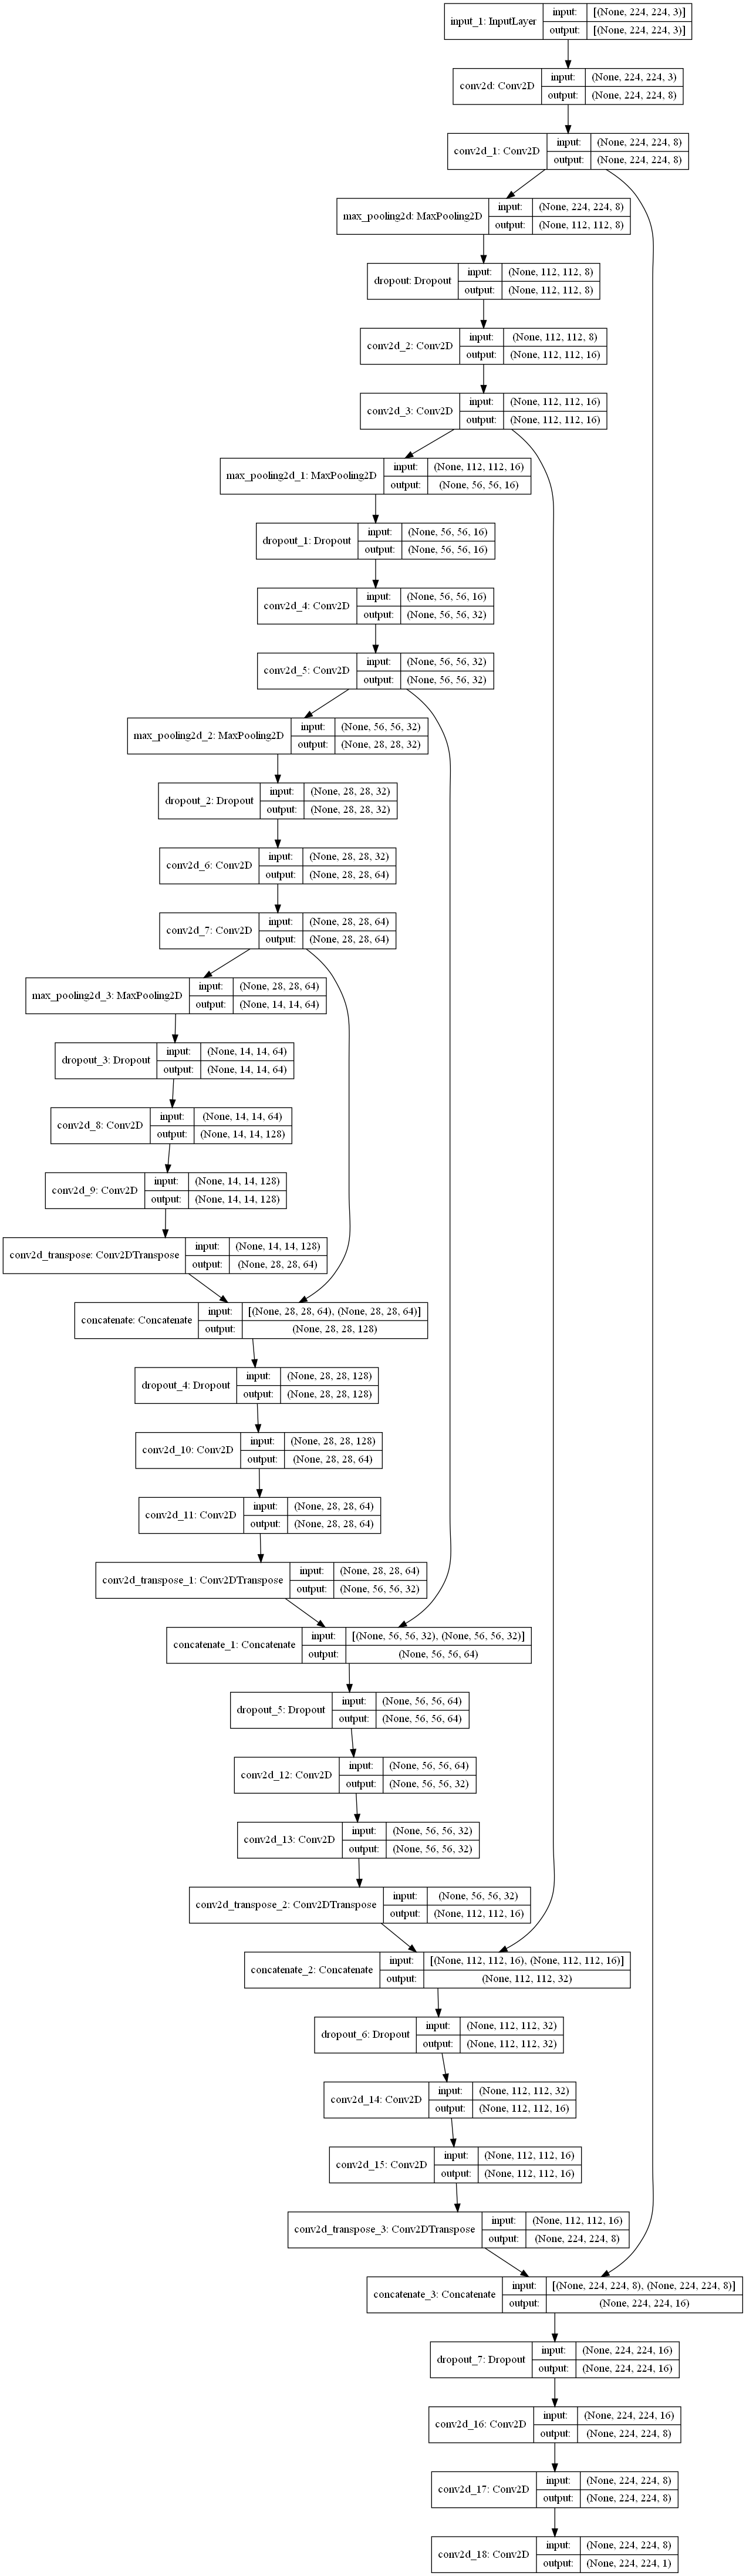

In [32]:
keras.utils.plot_model(model,show_shapes=True)

### Dataset

In [5]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    batch_size : int -> Batch size
    epochs : int -> Number of epochs
    batches : int -> Number of batches ( Will be calculated automatically )
    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        self.train_x = None
        self.train_y = None
        self.test_x = None
        self.test_y = None

### MNIST

In [54]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    batch_size : int -> Batch size
    epochs : int -> Number of epochs
    batches : int -> Number of batches ( Will be calculated automatically )
    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        (X,Y),(x,y)  = keras.datasets.mnist.load_data()
        
        self.train_x = X.reshape(-1,784) / 255
        self.train_y = keras.utils.to_categorical(Y)
        self.test_x = x.reshape(-1,784) / 255
        self.test_y = keras.utils.to_categorical(y)
        
        self.x_shape = (28, 28, 1)

In [55]:
dataset = Dataset()
dataset.train_x.shape,dataset.train_y.shape

((60000, 784), (60000, 10))

### Boston Housing

In [56]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    batch_size : int -> Batch size
    epochs : int -> Number of epochs
    batches : int -> Number of batches ( Will be calculated automatically )
    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        (X,Y),(x,y)  = keras.datasets.boston_housing.load_data()
        
        self.train_x = X 
        self.train_y = Y
        self.test_x = x 
        self.test_y = y
        
        self.x_shape = (13,)

In [57]:
dataset = Dataset()
dataset.train_x.shape,dataset.train_y.shape

((404, 13), (404,))

### CIFAR10

In [58]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    batch_size : int -> Batch size
    epochs : int -> Number of epochs
    batches : int -> Number of batches ( Will be calculated automatically )
    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        (X,Y),(x,y)  = keras.datasets.cifar10.load_data()
        
        self.train_x = X.reshape(-1, 32, 32, 3) / 255
        self.train_y = keras.utils.to_categorical(Y)
        self.test_x = x.reshape(-1, 32, 32, 3) / 255
        self.test_y = keras.utils.to_categorical(y)
        
        self.x_shape = (32, 32, 1)

In [59]:
dataset = Dataset()
dataset.train_x.shape,dataset.train_y.shape

((50000, 32, 32, 3), (50000, 10))

### CIFAR100

In [60]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        (X,Y),(x,y)  = keras.datasets.cifar100.load_data()
        
        self.train_x = X.reshape(-1, 32, 32, 3) / 255
        self.train_y = keras.utils.to_categorical(Y)
        self.test_x = x.reshape(-1, 32, 32, 3) / 255
        self.test_y = keras.utils.to_categorical(y)
        
        self.x_shape = (32, 32, 1)

In [61]:
dataset = Dataset()
dataset.train_x.shape,dataset.train_y.shape

((50000, 32, 32, 3), (50000, 100))

### Fashion MNIST

In [5]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        (X,Y),(x,y)  = keras.datasets.fashion_mnist.load_data()
        
        self.train_x = X.reshape(-1, 28, 28, 3) / 255
        self.train_y = keras.utils.to_categorical(Y)
        self.test_x = x.reshape(-1, 28, 28, 3) / 255
        self.test_y = keras.utils.to_categorical(y)
        
        self.x_shape = (28, 28, 1)

In [11]:
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        
        (X,Y),(x,y)  = keras.datasets.imdb.load_data()
        
        self.train_x = X
        self.train_y = Y
        self.test_x = x
        self.test_y = y
        
        self.x_shape = (None,)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


from concurrent.futures import ThreadPoolExecutor
from glob import glob
from gc import collect

In [32]:
train_set = glob("..\\data\\datasets\\imagenet\\train\\*\\*")[::8]
test_set = glob("..\\data\\datasets\\imagenet\\val\\*\\*")[::8]

In [33]:
train_labels = [ i.split("\\")[-2] for i in train_set ]
test_labels = [ i.split("\\")[-2] for i in test_set ]

In [34]:
labels = list(set(train_labels))

In [35]:
train_y = keras.utils.to_categorical([ labels.index(i) for i in train_labels ] )
test_y = keras.utils.to_categorical([ labels.index(i) for i in test_labels ] )

In [36]:
train_x = np.zeros((len(train_set),224,224,3)).astype(np.uint8)
test_x = np.zeros((len(test_set),224,224,3)).astype(np.uint8)

def get_image(args):
    index,path,array = args
    im = cv2.imread(path,)[:,:,::-1]
    im = cv2.resize(im,(224,224),interpolation=cv2.INTER_AREA)
    array[index] = im
    return 1


with ThreadPoolExecutor(max_workers=32) as executor:
    res = executor.map(get_image,[ ( i,path,train_x ) for i,path in enumerate(train_set)])
    
with ThreadPoolExecutor(max_workers=32) as executor:
    res = executor.map(get_image,[ ( i,path,test_x ) for i,path in enumerate(test_set)])

collect()

0

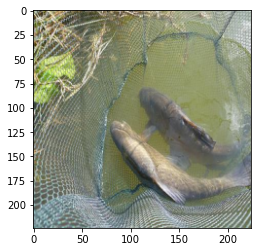

In [37]:
plt.imshow(train_x[0])

In [38]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1184, 224, 224, 3), (1184, 10), (491, 224, 224, 3), (491, 10))

In [4]:
keras.applications.VGG16()

553467904/553467096 [==============================] - 468s 1us/step


In [ ]:
"""
Note : Don't change dataset id.

All the required packages have been imported with their standard namespaces.

tensorflow as tf
keras as keras
pandas as pd
numpy as np

from sklearn.model_selection , train_test_split
"""


#dataset id=dataset_1
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    batch_size : int -> Batch size
    epochs : int -> Number of epochs
    batches : int -> Number of batches ( Will be calculated automatically )
    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """
        train_set = glob(".\\data\\datasets\\imagenet\\train\\*\\*")[::8]
        test_set = glob(".\\data\\datasets\\imagenet\\val\\*\\*")[::8]
        
        train_labels = [ i.split("\\")[-2] for i in train_set ]
        test_labels = [ i.split("\\")[-2] for i in test_set ]

        labels = list(set(train_labels))

        self.train_y = keras.utils.to_categorical([ labels.index(i) for i in train_labels ] )
        self.test_y = keras.utils.to_categorical([ labels.index(i) for i in test_labels ] )

        self.train_x = np.zeros((len(train_set),224,224,3)).astype(np.uint8)
        self.test_x = np.zeros((len(test_set),224,224,3)).astype(np.uint8)

        def get_image(args):
            index,path,array = args
            im = cv2.imread(path,)[:,:,::-1]
            im = cv2.resize(im,(224,224),interpolation=cv2.INTER_AREA)
            array[index] = im
            return 1


        with ThreadPoolExecutor(max_workers=32) as executor:
            res = executor.map(get_image,[ ( i,path,self.train_x ) for i,path in enumerate(train_set)])
            
        with ThreadPoolExecutor(max_workers=32) as executor:
            res = executor.map(get_image,[ ( i,path,self.test_x ) for i,path in enumerate(test_set)])

        collect()
        
        

# Do not change the anything.
dataset_1 = Dataset()
#end-dataset id=dataset_1


In [20]:
"""
Note : Don't change dataset id.

All the required packages have been imported with their standard namespaces.

tensorflow as tf
keras as keras
pandas as pd
numpy as np

from sklearn.model_selection , train_test_split
"""


#dataset id=dataset_1
class Dataset:
    """
    Dataset will be used in training 

    The dataset object needs to have following attributes

    train_x : np.ndarray -> Training features
    train_y : np.ndarray -> Training labels 
    test_x : np.ndarray -> Testing features
    test_y : np.ndarray -> Testing labels

    validate : bool -> Weather use validation data or not

    batch_size : int -> Batch size
    epochs : int -> Number of epochs
    batches : int -> Number of batches ( Will be calculated automatically )
    """
    train_x = None
    test_x = None
    train_y = None
    test_y = None

    validate = True

    def __init__(self) -> None:
        """
        Load dataset and set required variables.
        """

        images = glob("../data/datasets/bfsiw/leedsbutterfly/images/*")
        labels = glob("../data/datasets/bfsiw/leedsbutterfly/segmentations/*")

    
        self.train_x = np.zeros((len(images),224,224,3)).astype(np.float32)
        self.train_y = np.zeros((len(labels),224,224,3)).astype(np.float32)

        def get_image(args):
            index,path,array = args
            im = cv2.imread(path,)[:,:,::-1]
            im = cv2.resize(im,(224,224),interpolation=cv2.INTER_AREA)
            array[index] = im
            return 1


        with ThreadPoolExecutor(max_workers=32) as executor:
            res = executor.map(get_image,[ ( i,path,self.train_x ) for i,path in enumerate(images)])
            
        with ThreadPoolExecutor(max_workers=32) as executor:
            res = executor.map(get_image,[ ( i,path,self.train_y ) for i,path in enumerate(labels)])

        self.train_y = self.train_y.mean(axis=-1) / 255
        test_idx = np.random.randint(0,len(self.train_x),size=32)
        
        self.test_x = self.train_x[test_idx]
        self.test_y = self.train_y[test_idx]

        collect()
        


In [21]:
dataset_1 = Dataset()

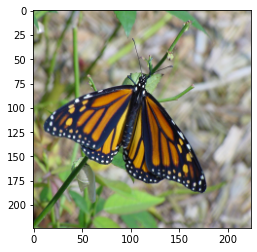

In [22]:
plt.imshow(dataset_1.train_x[0].astype(np.uint8))

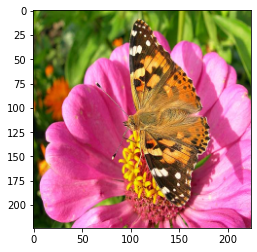

In [25]:
plt.imshow(dataset_1.test_x[0].astype(np.uint8))